### Дерево решений

Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации.

Огромное преимущество деревьев решений в том, что они легко интерпретируемы, понятны человеку.

In [1]:
from __future__ import division, print_function

# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

**Энтропия Шеннона** определяется для системы с $N$ возможными состояниями следующим образом:


$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. 

**np.linspace** - возвращает равномерно распределенные числа в указанном интервале.

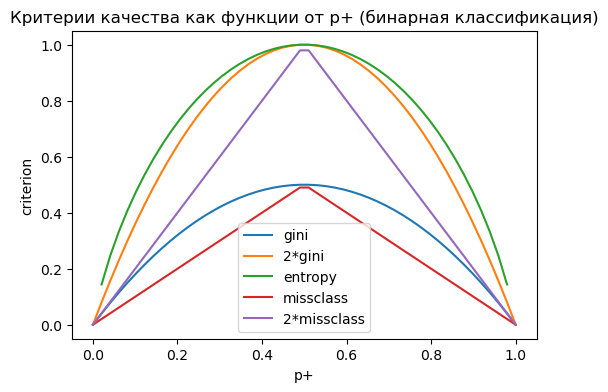

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();

In [3]:
xx

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

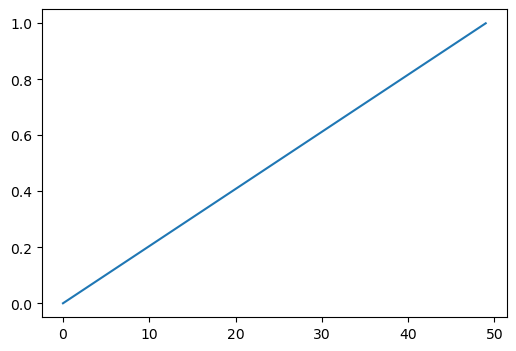

In [4]:
plt.plot(xx, label='gini')

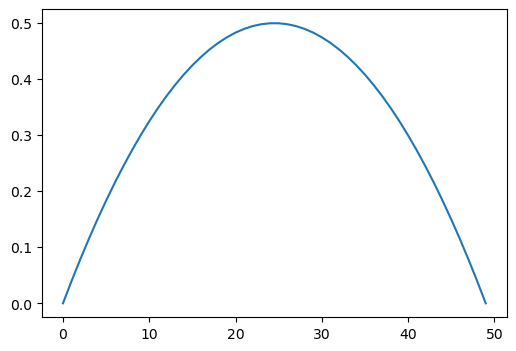

In [5]:
plt.plot([2 * x * (1-x) for x in xx], label='gini')

**Объекты r_ и c_**

**r_** создает копии массивов, следующими способами:

1) np.r_[ [1, 2, 3], 4, 5]  # список + дополнительные элементы
2) np.r_[ 1:9, 90, 100] # срез + два элемента
3) np.r_[ np.array([1,2,3]), np.array([4,5,6])] # объединение двух массивов
4) np.r_[ [(1,2,3), (4,5,6)], [(7,8,9)] ]  # объединение двумерного и одномерного списков

По аналогии работает и второй объект **c_**, только объединение выполняется по второй оси axis1:

1) np.c_[1:5]
2) np.c_[ [1, 2, 3], [4, 5, 6]]
3) np.c_[ [(1,2,3), (4,5,6)], [[7],[8]] ]

In [6]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [7]:
k1 = np.random.normal(size=(5, 2))
k1

array([[-0.06000144,  0.78768534],
       [-1.43170411,  0.43390945],
       [ 0.13891007, -1.61826901],
       [ 1.33732003, -0.70407718],
       [ 0.68322872, -0.41993493]])

In [8]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
np.ones(100)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

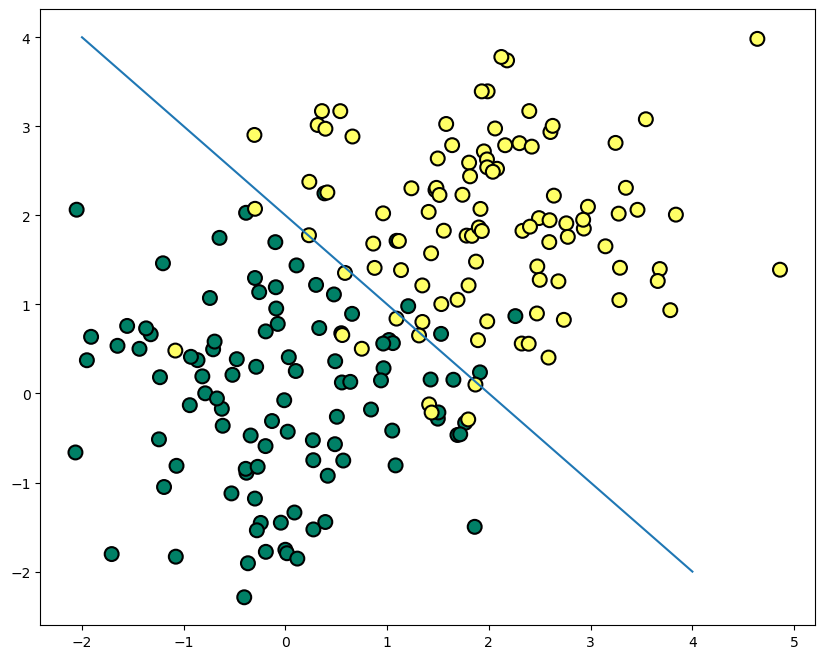

In [10]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='summer', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [11]:
np.random.normal(size=(5, 2))

array([[ 0.99354289,  1.31226176],
       [-0.83004948, -1.53039869],
       [-0.13141005,  0.84891664],
       [-0.37131216, -0.61352358],
       [ 0.48828226, -2.76151747]])

In [12]:
xx[:10]

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347])

Попробуем разделить эти два класса, обучив дерево решений. В дереве будем использовать параметр max_depth, ограничивающий глубину дерева. Визуализируем полученную границу разделения классов.

Функция **numpy.ravel()** возвращает непрерывный сглаженный массив (одномерный массив со всеми элементами входного массива и с тем же типом, что и он). 

Копия создается только при необходимости. 

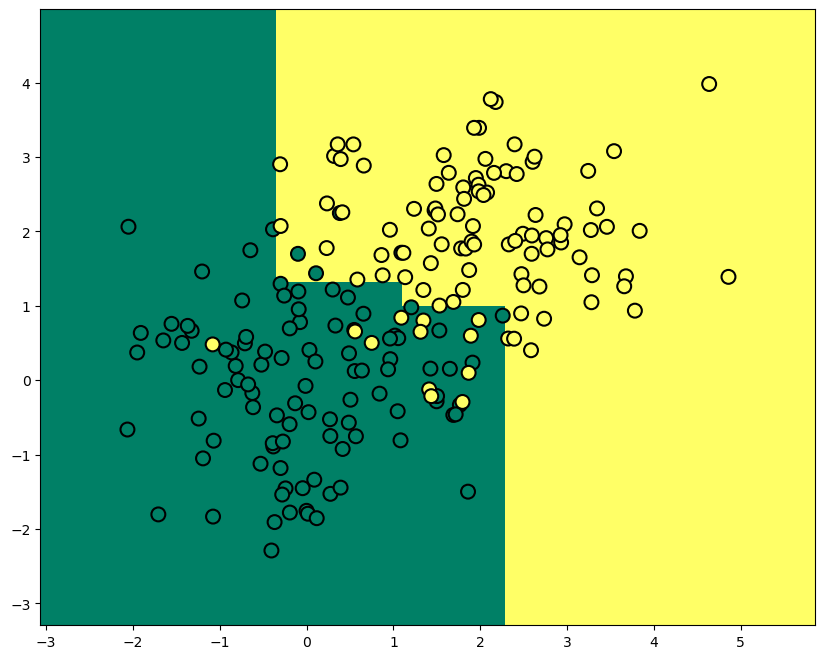

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='summer')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='summer', edgecolors='black', linewidth=1.5);


In [14]:
xx.shape

(828, 893)

In [15]:
np.r_[ [1, 2, 3], 4, 5]

array([1, 2, 3, 4, 5])

In [16]:
np.c_[1:5]

array([[1],
       [2],
       [3],
       [4]])

In [17]:
np.c_[ [1, 2, 3], [4, 5, 6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [18]:
np.c_[[(1,2,3), (4,5,6)], [[7],[8]]]

array([[1, 2, 3, 7],
       [4, 5, 6, 8]])

In [20]:
%pip install pydotplus
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    # needs graphviz to be installed
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 217.9 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/278.7 kB 186.2 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/278.7 kB 178.6 kB/s eta 0:00:02
     -------------- --------------------- 112.6/278.7 kB 467.6 kB/s eta 0:00:01
     -------------------------- --------- 204.8/278.7 kB 689.9 kB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 818.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=f74972887ccf2874f85264c2bdfbb448627bebd5383f9429027cd7874d43bde5
  Stored in directory: c:\users\us\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b

In [21]:
#tree_graph_to_png(
#    tree=clf_tree,
#    feature_names=["x1", "x2"],
#    png_file_to_save="topic3_decision_tree1.png",
#)

[Text(0.5769230769230769, 0.875, 'x[0] <= 1.103\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 1.325\nentropy = 0.657\nsamples = 106\nvalue = [88, 18]'),
 Text(0.15384615384615385, 0.375, 'x[1] <= 0.447\nentropy = 0.276\nsamples = 84\nvalue = [80, 4]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.605\nsamples = 27\nvalue = [23, 4]'),
 Text(0.46153846153846156, 0.375, 'x[0] <= -0.346\nentropy = 0.946\nsamples = 22\nvalue = [8, 14]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]'),
 Text(0.8461538461538461, 0.625, 'x[1] <= 0.992\nentropy = 0.551\nsamples = 94\nvalue = [12, 82]'),
 Text(0.7692307692307693, 0.375, 'x[0] <= 2.291\nentropy = 0.996\nsamples = 26\nvalue = [12, 14]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.971\nsamples = 20\

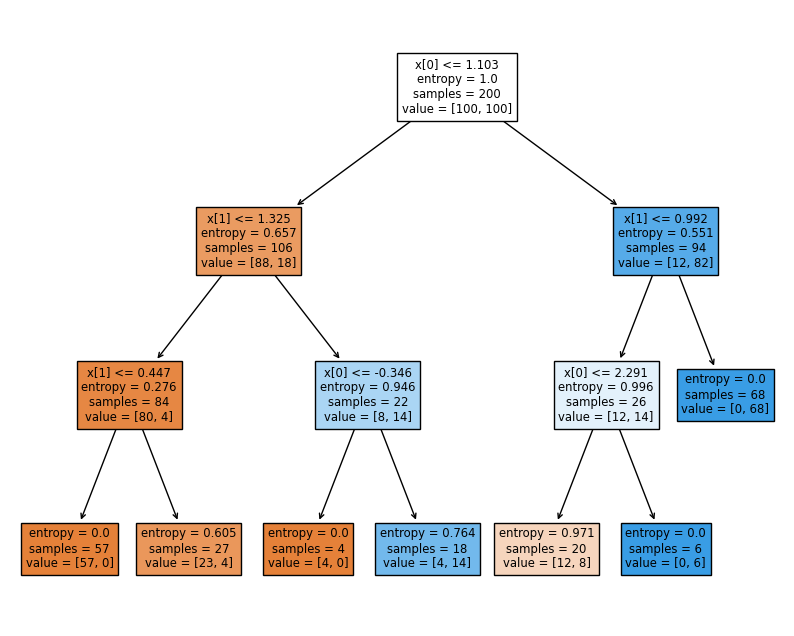

In [22]:
from sklearn import tree
tree.plot_tree(clf_tree, filled=True)

**Как "читается" такое дерево?**


В начале было 200 объектов, 100 — одного класса и 100 – другого. Энтропия начального состояния была максимальной – 1. Затем было сделано разбиение объектов на 2 группы в зависимости от сравнения признака $x_1$. При этом энтропия и в левой, и в правой группе объектов уменьшилась. И так далее, дерево строится до глубины 3. 

При такой визуализации чем больше объектов одного класса, тем цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему. В начале объектов одного класса поровну, поэтому корневая вершина дерева – белого цвета.

[Text(0.5769230769230769, 0.875, 'x1 <= 1.103\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]\nclass = Negative'),
 Text(0.3076923076923077, 0.625, 'x2 <= 1.325\nentropy = 0.657\nsamples = 106\nvalue = [88, 18]\nclass = Negative'),
 Text(0.15384615384615385, 0.375, 'x2 <= 0.447\nentropy = 0.276\nsamples = 84\nvalue = [80, 4]\nclass = Negative'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]\nclass = Negative'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.605\nsamples = 27\nvalue = [23, 4]\nclass = Negative'),
 Text(0.46153846153846156, 0.375, 'x1 <= -0.346\nentropy = 0.946\nsamples = 22\nvalue = [8, 14]\nclass = Positive'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Negative'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]\nclass = Positive'),
 Text(0.8461538461538461, 0.625, 'x2 <= 0.992\nentropy = 0.551\nsamples = 94\nvalue = [12, 82]\nclass = Positive'),
 Text(0.7692

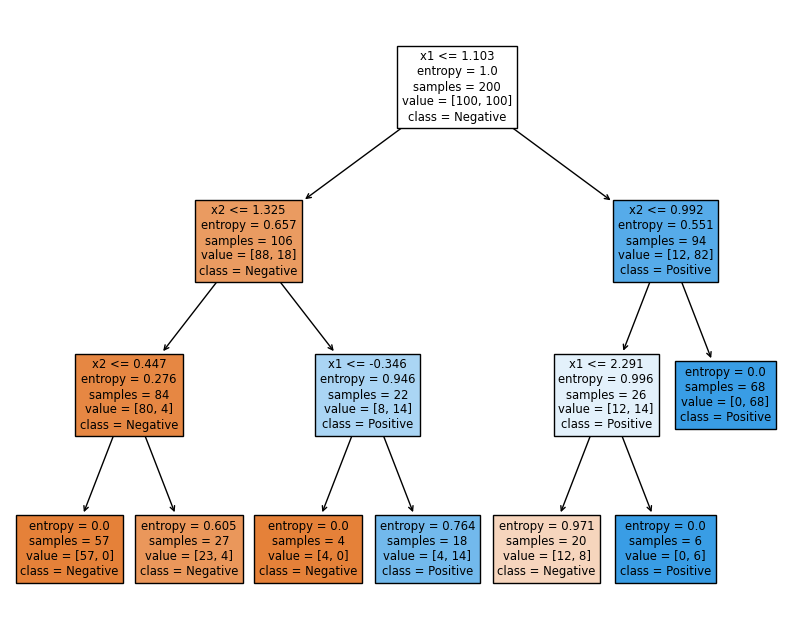

In [23]:
tree.plot_tree(clf_tree, feature_names=["x1", "x2"], class_names=['Negative', 'Positive'], filled=True)

In [24]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [25]:
data.sort_values(by='Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


[Text(0.42857142857142855, 0.9166666666666666, 'x[0] <= 43.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.2857142857142857, 0.75, 'x[0] <= 19.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.14285714285714285, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= 22.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2857142857142857, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.4166666666666667, 'x[0] <= 30.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.42857142857142855, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.25, 'x[0] <= 32.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5714285714285714, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5714285714285714, 0.75, 'gini = 0.0\nsamples = 3

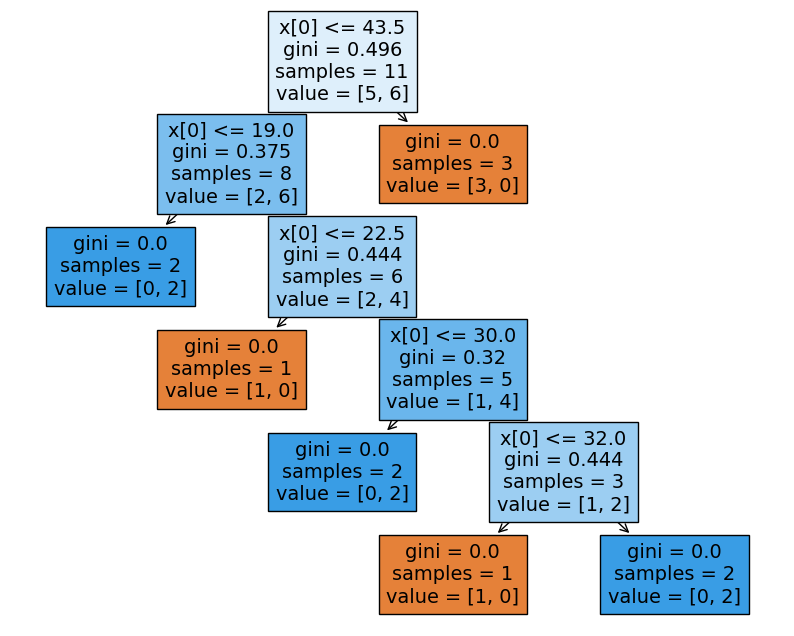

In [26]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

tree.plot_tree(age_tree, filled=True)

In [27]:
data['Age']

0     17
1     64
2     18
3     20
4     38
5     49
6     55
7     25
8     29
9     31
10    33
Name: Age, dtype: int64

In [28]:
data['Age'].values

array([17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], dtype=int64)

In [29]:
data['Age'].values.reshape(-1, 1)

array([[17],
       [64],
       [18],
       [20],
       [38],
       [49],
       [55],
       [25],
       [29],
       [31],
       [33]], dtype=int64)

In [30]:
data['Loan Default'].values

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [31]:
data2 = pd.DataFrame({
    "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
    "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
    "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
})
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [32]:
data2.sort_values(by='Age')

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


[Text(0.7142857142857143, 0.9, 'x[0] <= 43.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.5714285714285714, 0.7, 'x[1] <= 95.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= 22.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2857142857142857, 0.3, 'x[1] <= 30.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

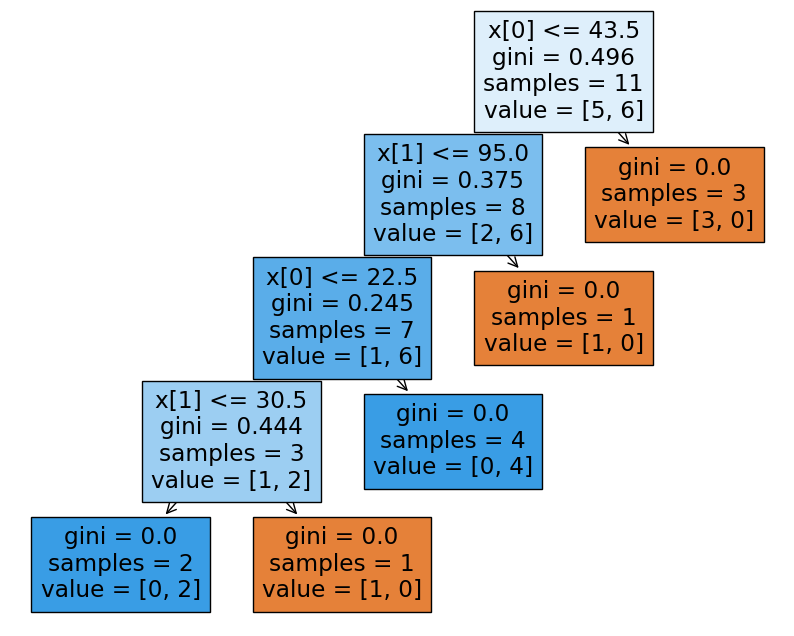

In [33]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'])

tree.plot_tree(age_sal_tree, filled=True, impurity=True)

**Основные параметры класса sklearn.tree.DecisionTreeClassifier:**


1) **max_depth** – максимальная глубина дерева

2) **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)

3) **min_samples_leaf** – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов

Дисперсия вокруг среднего: $\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2, $

Сгенерируем данные, распределенные вокруг функции $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ c некоторым шумом, обучим на них дерево решений и изобразим, какие прогнозы делает дерево.

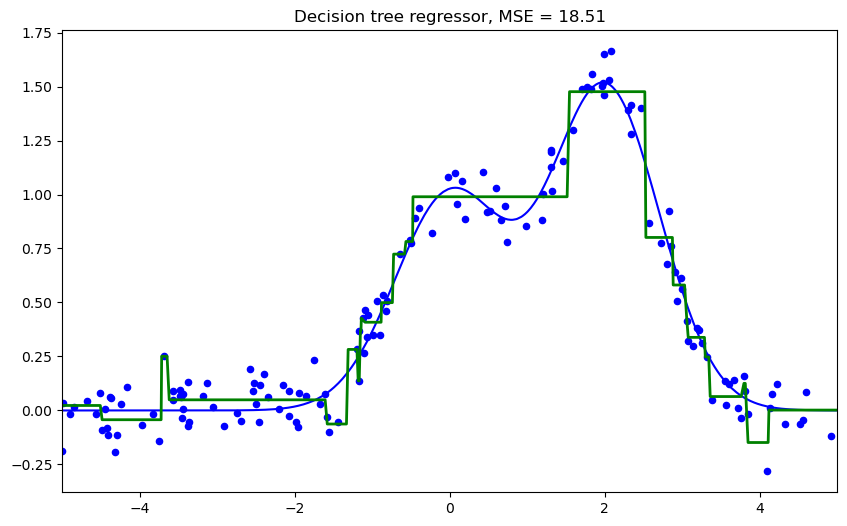

In [34]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

Видим, что дерево решений аппроксимирует зависимость в данных кусочно-постоянной функцией.

### Метод ближайших соседей 

Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации.

На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты.

Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:


1) Вычислить расстояние до каждого из объектов обучающей выборки
2) Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
3) Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

Качество классификации/регрессии методом ближайших соседей зависит от нескольких параметров:


1) **число соседей**

2) **метрика расстояния между объектами** (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.

3) **веса соседей** (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

Основные параметры класса sklearn.neighbors.KNeighborsClassifier:1) **weights**: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
2) **algorithm** (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей.
3) **leaf_size** (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
4) **metric**: "minkowski", "manhattan", "euclidean", "chebyshev" и другиецдругие

In [35]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [36]:
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

In [37]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [38]:
pd.factorize(df["International plan"])[0]

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
pd.factorize(df["International plan"])

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 Index(['No', 'Yes'], dtype='object'))

In [40]:
pd.factorize(df["International plan"])[1]

Index(['No', 'Yes'], dtype='object')

In [41]:
df["International plan"] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df["State"]
y = df['Churn']
df.drop(["State", "Churn"], axis=1, inplace=True)

In [42]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

In [44]:
states.head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели. 

**Обучим 2 модели – дерево решений и kNN**, пока не знаем, какие параметры хороши, поэтому наугад: глубину дерева берем 5, число ближайших соседей – 10.

In [58]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

Качество прогнозов будем проверять с помощью простой метрики – доли правильных ответов.

In [59]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.94

Дерево решений имеет долю правильных ответов около 94%

In [60]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred)

0.89

KNN имеет долю правильных ответов около 89%

### Кросс-валидация

Теперь настроим параметры дерева на кросс-валидации. Настраивать будем максимальную глубину и максимальное используемое на каждом разбиении число признаков. 

Суть работы GridSearchCV: для каждой уникальной пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [62]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1, 11),
              'max_features': range(4, 19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs = -1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [63]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [71]:
float(tree_grid.best_score_)

0.94257014456259

In [66]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.946

Теперь попробуем настроить число соседей в алгоритме kNN.

In [82]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

In [103]:
knn_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1))])

In [98]:
knn_params = {'knn__n_neighbors': range(1, 10)} 

In [99]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

In [100]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [101]:
knn_grid.best_params_

{'knn__n_neighbors': 7}

In [104]:
knn_grid.best_score_

0.8859867109023905

In [105]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

В этом примере дерево показало себя лучше, чем метод ближайших соседей: 94.2% правильных ответов на кросс-валидации и 94.6% на отложенной выборке против 88.6% / 89% для kNN. 

Более того, в данной задаче дерево проявляет себя очень хорошо, и даже случайный лес (который пока представляем просто как кучу деревьев, которые вместе работают почему-то намного лучше, чем одно дерево) в этом примере показывает долю правильных ответов не намного выше (95.1% на кросс-валидации и 95.3% –на отложенной выборке), а обучается намного дольше.

### Случайный лес

In [106]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
np.mean(cross_val_score(forest, X_train, y_train, cv=5))

0.9494233119813256

In [109]:
cross_val_score(forest, X_train, y_train, cv=5)

array([0.95074946, 0.94432548, 0.94860814, 0.9527897 , 0.95064378])

In [113]:
forest_params = {"max_depth": range(6, 9), "max_features": range(4, 8)}

forest_grid = GridSearchCV(forest, forest_params, n_jobs=-1, cv=5, verbose=True)
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(6, 9), 'max_features': range(4, 8)},
             verbose=True)

In [114]:
forest_grid.best_params_

{'max_depth': 8, 'max_features': 7}

In [115]:
forest_grid.best_score_

0.9489968845061622

In [116]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.952

Создадим множество точек на плоскости (2 признака), каждая точка будет относиться к одному из классов (+1, красные, или -1 – желтые). Если смотреть на это как на задачу классификации, то вроде все очень просто – классы разделяются прямой.

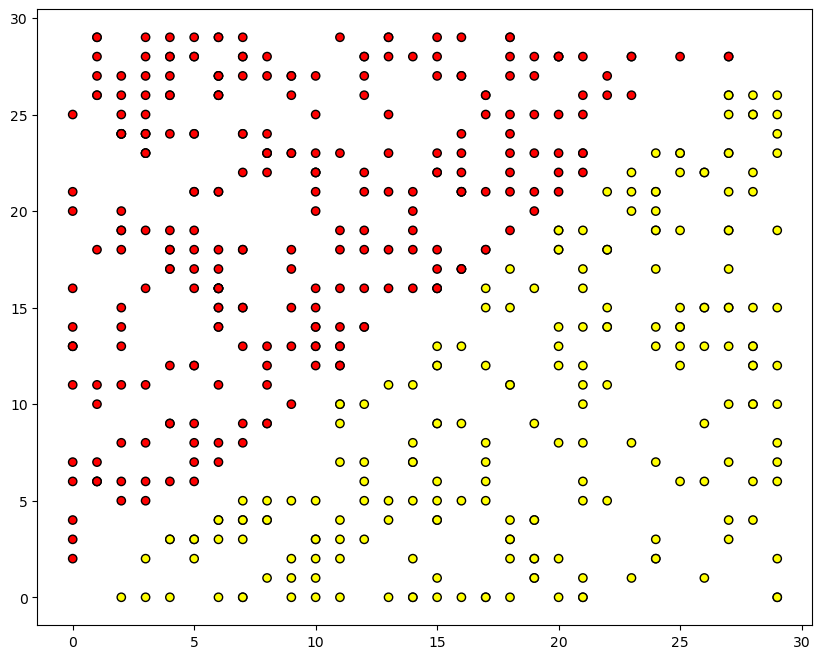

In [117]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)


X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn", edgecolors="black");

Однако дерево решений строит уж больно сложную границу и само по себе оказывается глубоким. Кроме того, представьте, как плохо дерево будет обобщаться на пространство вне представленного квадрата $30 \times 30$, обрамляющего обучающую выборку.

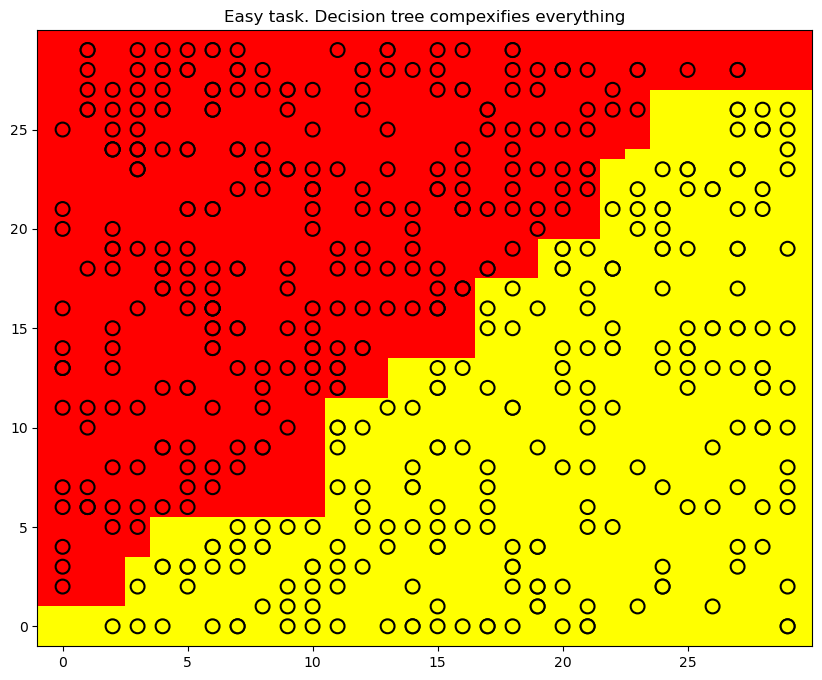

In [120]:
tree_1 = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree_1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task. Decision tree compexifies everything");

[Text(0.4921875, 0.9285714285714286, 'x[0] <= 16.5\ngini = 0.492\nsamples = 482\nvalue = [271, 211]'),
 Text(0.265625, 0.7857142857142857, 'x[1] <= 5.5\ngini = 0.367\nsamples = 301\nvalue = [228, 73]'),
 Text(0.125, 0.6428571428571429, 'x[0] <= 2.5\ngini = 0.158\nsamples = 58\nvalue = [5, 53]'),
 Text(0.0625, 0.5, 'x[1] <= 1.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.03125, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09375, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.1875, 0.5, 'x[0] <= 3.5\ngini = 0.037\nsamples = 53\nvalue = [1, 52]'),
 Text(0.15625, 0.35714285714285715, 'x[1] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21875, 0.35714285714285715, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.40625, 0.6428571428571429, 'x[1] <= 12.5\ngi

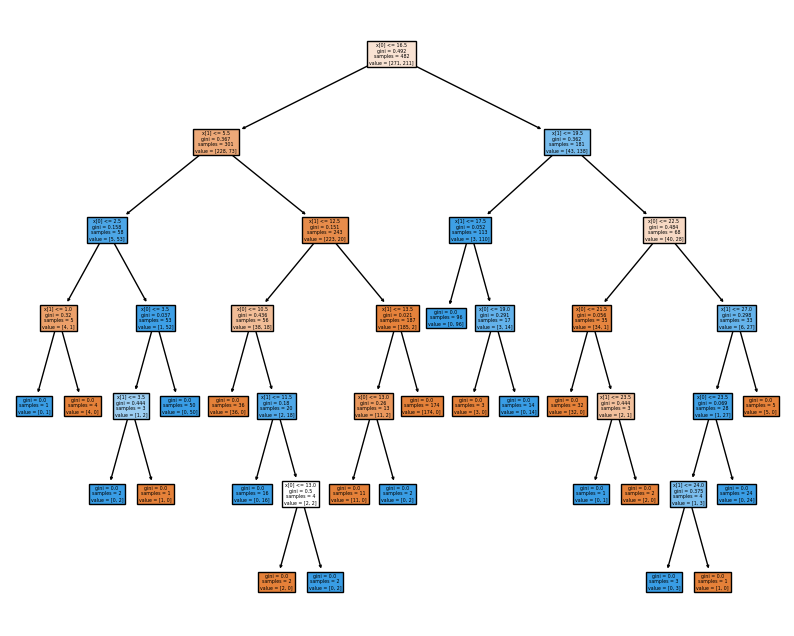

In [121]:
from sklearn import tree
tree.plot_tree(tree_1, filled=True)

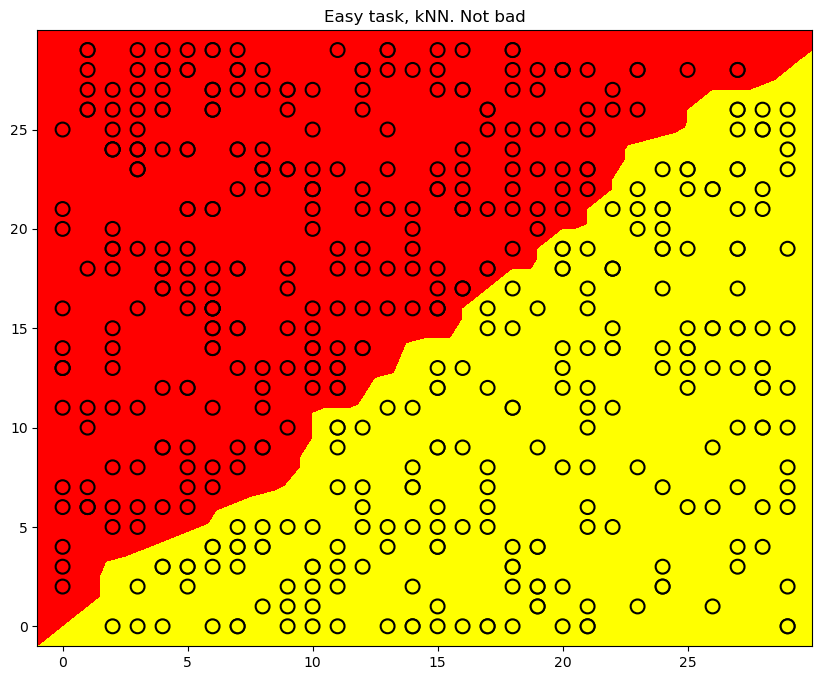

In [122]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task, kNN. Not bad");

### Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST

Теперь посмотрим на описанные 2 алгоритма в реальной задаче. Используем "встроенные" в sklearn данные по рукописным цифрам. Эта задача будет примером, когда метод ближайших соседей работает на удивление хорошо.

Картинки здесь представляются матрицей 8 x 8 (интенсивности белого цвета для каждого пикселя). Далее эта матрица "разворачивается" в вектор длины 64, получается признаковое описание объекта.

Нарисуем несколько рукописных цифр, видим, что они угадываются.

In [124]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

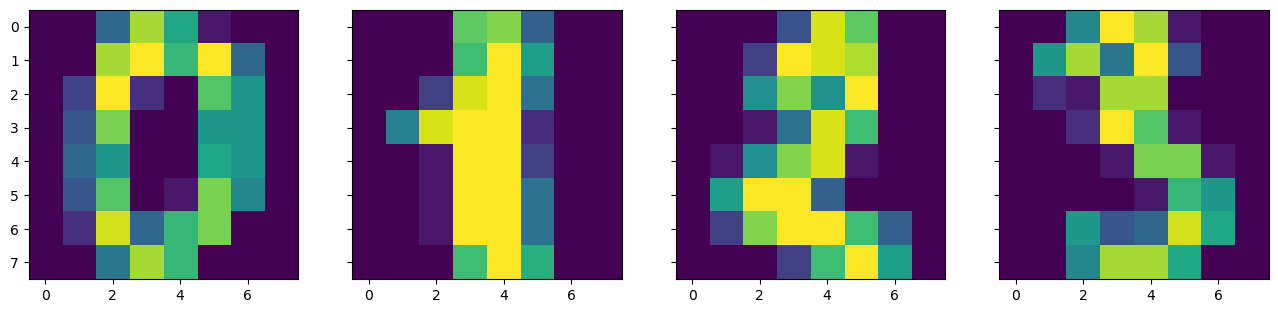

In [126]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

Далее проведем ровно такой же эксперимент, как и в прошлой задаче, только диапазоны изменения настраиваемых параметров будут немного другие.